# Simple Linear Regression: Sklearn

(Note: checking model assumptions and preprocessing excluded)

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Load data

In [2]:
url = "https://raw.githubusercontent.com/mk-gurucharan/Regression/master/Salary_Data.csv"
df = pd.read_csv(url)
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Train-Test Split

In [3]:
# declare features and targets
y = df["YearsExperience"]
X = df[["Salary"]]

In [4]:
# 80:20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape[0])
print(X_test.shape[0])
print(X_train.shape[0] / X.shape[0])

24
6
0.8


## Build and train model

In [5]:
# create linear regression model and train it
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Get model parameters

In [6]:
# get y-intercept and feature weights
alpha = regressor.intercept_
beta1 = regressor.coef_[0]

## Plot regression line

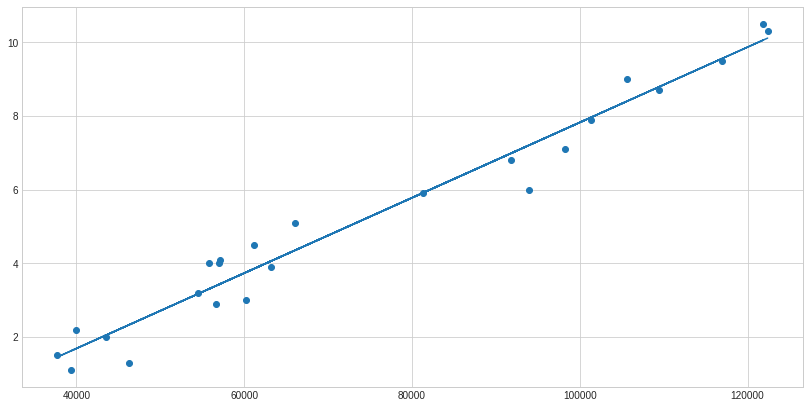

In [7]:
# plot regression line with training data
plt.figure(figsize=(14,7))
plt.scatter(X_train, y_train)
plt.plot(X_train, alpha + beta1*X_train)
plt.show()

## Make prediction

In [8]:
# use model to make prediction and compare to actuals
yhat = regressor.predict(X_test)
eval_df = pd.DataFrame({"Actuals": y_test, "Predictions": yhat})
eval_df

,Actuals,Predictions
27,9.6,9.120593
15,4.9,4.545795
23,8.2,9.241061
17,5.3,6.096418
8,3.2,4.188282
9,3.7,3.445621


## Evaluate Model

In [9]:
# compute mean squared error
mean_squared_error(y_test, yhat)

0.5191320118982409

In [10]:
# get R-Squared
R2 = regressor.score(X_train, y_train)
R2

0.9645401573418146

## Plot regression with actuals and predictions

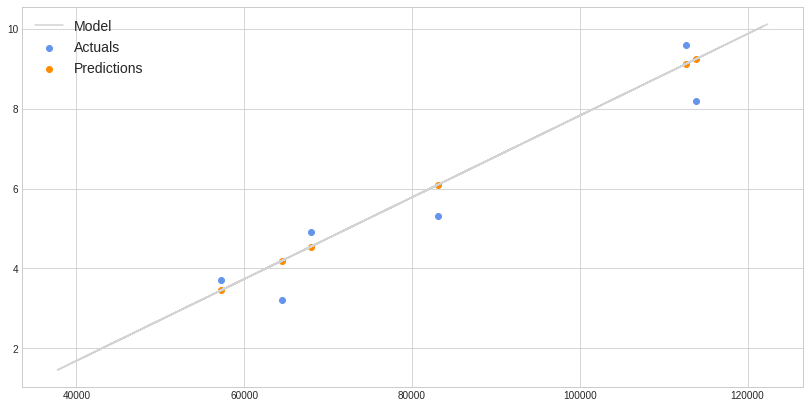

In [11]:
# plot scatters of y_test and yhat and line of regression of training data
plt.figure(figsize=(14,7))
plt.scatter(X_test, y_test, c="cornflowerblue", label="Actuals")
plt.scatter(X_test, yhat, c="darkorange", label="Predictions")
plt.plot(X_train, alpha + beta1*X_train, c="lightgrey", label="Model")
plt.legend(fontsize=14)
plt.show()